In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow import keras

In [2]:
datatrain_dir = 'dataset/train'

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory
image_height = 256
batch_size=32
train_ds = image_dataset_from_directory(
  datatrain_dir,
  validation_split=0.2,
  subset="training",
  seed=3,
  image_size=(image_height, image_height),
  batch_size=batch_size)

Found 13642 files belonging to 14 classes.
Using 10914 files for training.


In [4]:
path = r'dataset/train'
classS = os.listdir(path)
for file in classS:
    print(file)

astilbe
bellflower
black_eyed_susan
calendula
california_poppy
carnation
common_daisy
coreopsis
dandelion
iris
rose
sunflower
tulip
water_lily


In [5]:
val_ds = image_dataset_from_directory(
  datatrain_dir,
  validation_split=0.2,
  subset="validation",
  seed=3,
  image_size=(image_height, image_height),
  batch_size=batch_size)

Found 13642 files belonging to 14 classes.
Using 2728 files for validation.


In [6]:
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Flatten, Dense

resnet_model = Sequential()

pretrained_model= ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',
                   classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(15, activation='softmax'))

94765736/94765736 [==============================] - 82s 1us/step


In [7]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 24644495 (94.01 MB)
Trainable params: 1056783 (4.03 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [9]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data = val_ds,  
  epochs=epochs
)

Epoch 1/10


342/342 [==============================] - 740s 2s/step - loss: 0.5120 - accuracy: 0.8441 - val_loss: 0.4677 - val_accuracy: 0.8563
Epoch 2/10
342/342 [==============================] - 748s 2s/step - loss: 0.2276 - accuracy: 0.9256 - val_loss: 0.3590 - val_accuracy: 0.8915
Epoch 3/10
342/342 [==============================] - 736s 2s/step - loss: 0.1426 - accuracy: 0.9520 - val_loss: 0.3034 - val_accuracy: 0.9102
Epoch 4/10
342/342 [==============================] - 876s 3s/step - loss: 0.0988 - accuracy: 0.9665 - val_loss: 0.3243 - val_accuracy: 0.9062
Epoch 5/10
342/342 [==============================] - 723s 2s/step - loss: 0.0688 - accuracy: 0.9772 - val_loss: 0.3895 - val_accuracy: 0.9062
Epoch 6/10
342/342 [==============================] - 754s 2s/step - loss: 0.0574 - accuracy: 0.9813 - val_loss: 0.4235 - val_accuracy: 0.9025
Epoch 7/10
342/342 [==============================] - 931s 3s/step - loss: 0.0529 - accuracy: 0.9822 - val_loss: 0.3904 - val_accuracy: 0.9054
Epoch 8/10

In [10]:
def predict_img(fpath):
    image=cv2.imread(fpath)
    example = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(example)
    image_resized= cv2.resize(image, (image_height,image_height))
    image=np.expand_dims(image_resized,axis=0)
    # print(image)
    pred=resnet_model.predict(image)
    output=classS[np.argmax(pred)]
    print(output)

Now let us look at the predictions for test images!

1/1 [==============================] - 0s 96ms/step
water_lily


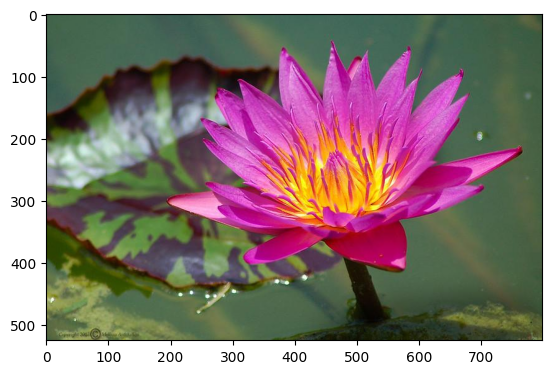

In [18]:
predict_img('dataset/test/water_lily/375534490_c9e9a062f4_c.jpg')

1/1 [==============================] - 0s 85ms/step
tulip


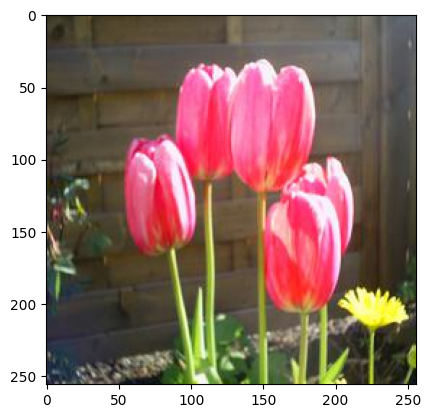

In [14]:
predict_img('dataset/test/tulip/2178263519_d5a6f5dd1c_c.jpg')

In [19]:
resnet_model.save("flower_model.h5")

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
